In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
from sklearn.metrics import accuracy_score, classification_report

In [30]:
#importing the diabetes dataset

In [31]:
data=pd.read_csv("diabetes.csv")

In [32]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
# DATA PREPROCESSING STEP

In [33]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
print(f'Duplicated rows are: \n {data.duplicated().sum()} \n \n \n Null values per column are: \n {data.isnull().sum()}\n \n \n Zero values per column are: \n {(data == 0).sum()} , \n \n \n data types of each column is: \n {data.dtypes} \n \n \n  statistical details of the dataset is: \n {data.describe()} ')

Duplicated rows are: 
 0 
 
 
 Null values per column are: 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
 
 
 Zero values per column are: 
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64 , 
 
 
 data types of each column is: 
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         

In [39]:
error_values = (data["Glucose"] == 0) | (data["BloodPressure"] == 0) | (data["SkinThickness"] == 0) | (data["Insulin"] == 0) | (data["BMI"] == 0)
error_values.sum()

376

In [43]:
vals=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in vals:
    data[i].replace(0, np.nan, inplace=True)
    data[i].fillna(data[i].median(), inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [51]:
import matplotlib.pyplot as plt

In [48]:
import seaborn as sns

/tmp/ipykernel_4607/2675025514.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], color=m, ax=ax)
/tmp/ipykernel_4607/2675025514.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], color=m, ax=ax)
/tmp/ipykernel_4607/2675025514.py:7: UserWarning: 

`distplot` is a deprecated f

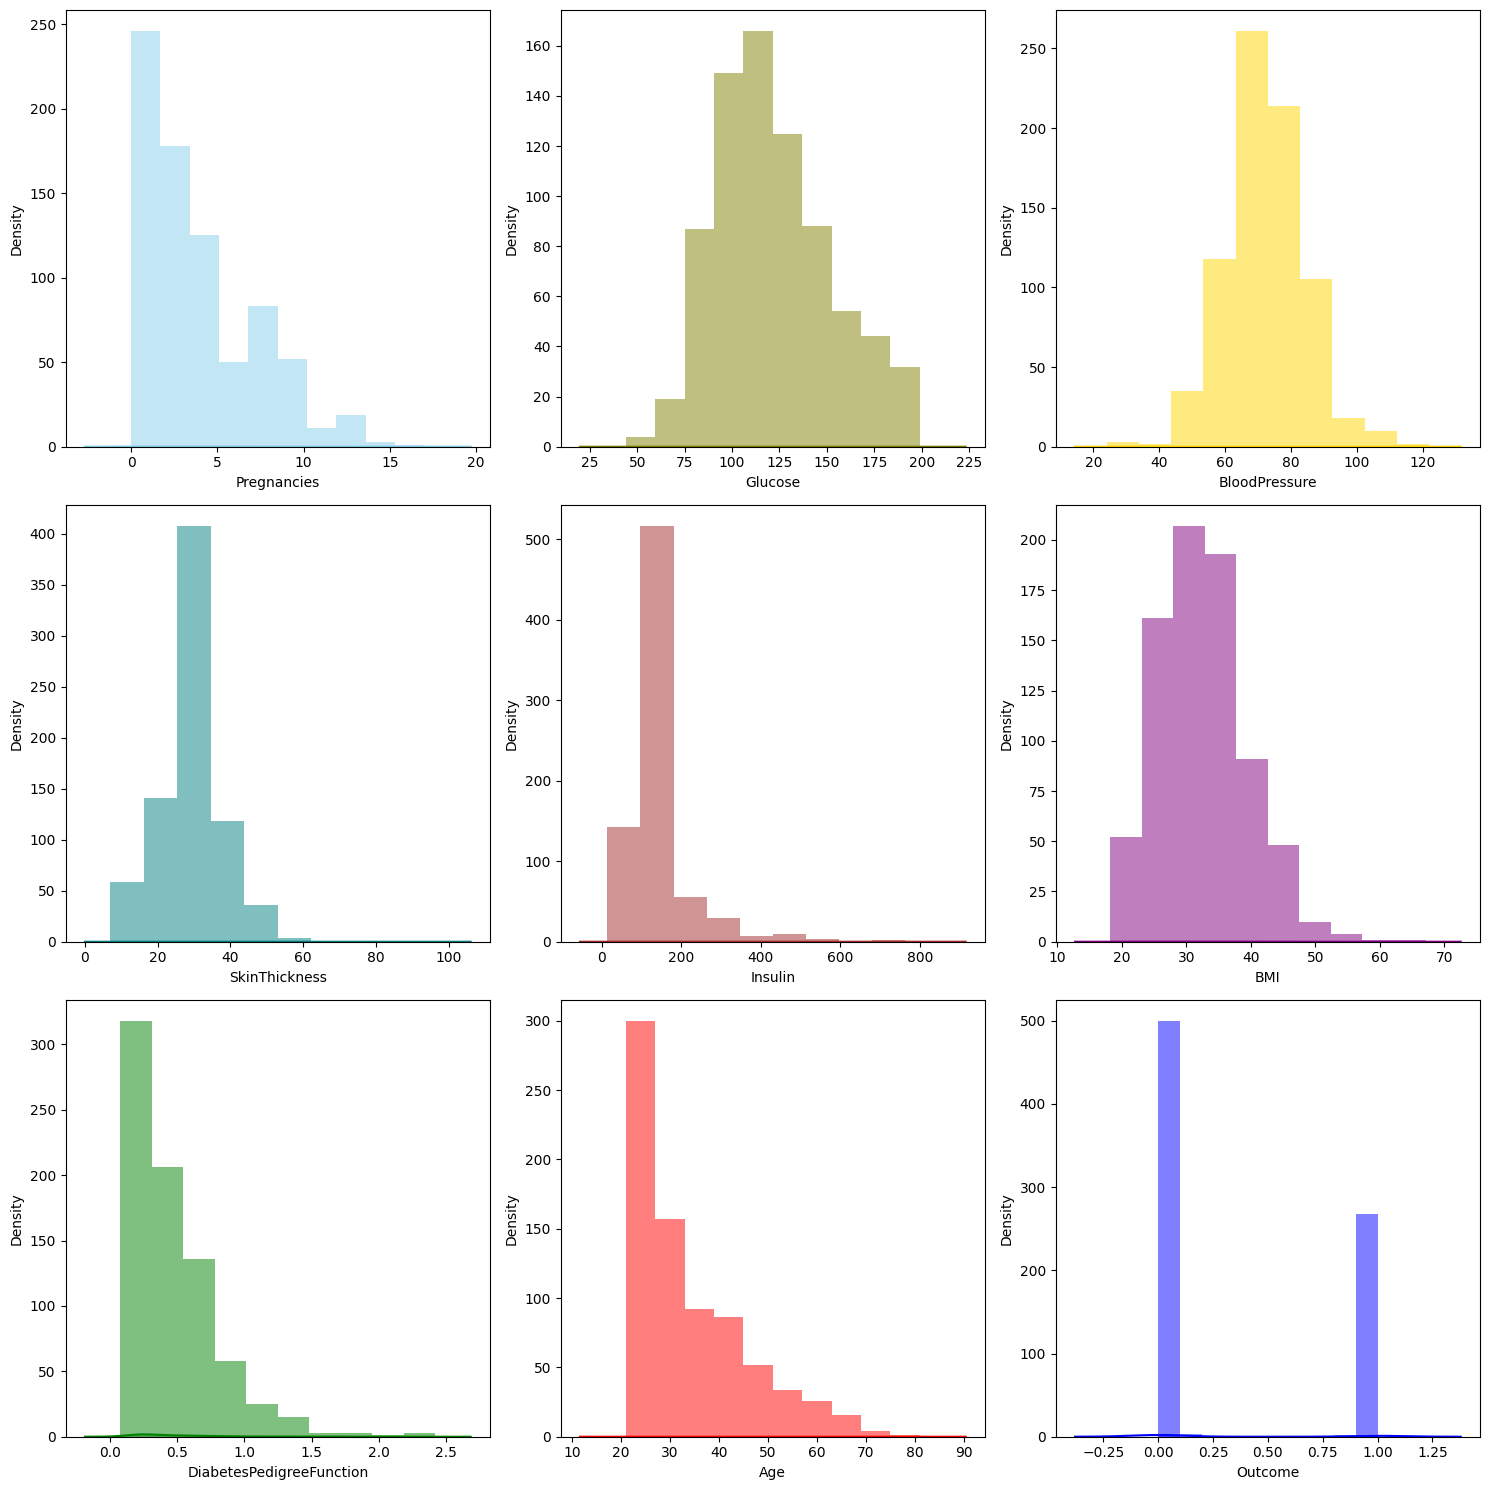

In [54]:
vals=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
vals_col=['skyblue','olive','gold','teal','brown','purple','green','red','blue']
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False) 
axes = axes.flatten()  # Plot a simple histogram with binsize determined automatically
for ax,k,m in zip(axes,vals,vals_col):
    ax.hist(data[k], color=m, bins=10, alpha=0.5)
    sns.distplot(data[k], color=m, ax=ax)
plt.tight_layout() 



In [ ]:
# test triain split

In [ ]:
X=data.drop('Outcome',axis=1) #instaces
y=data['Outcome'] # Target variable 

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#creating a decision tree model and training them

In [ ]:
dtm=DecisionTreeClassifier(random_state=42)
dtm.fit(X_train,y_train)

In [ ]:
#making predictions

In [ ]:
y_pred=dtm.predict(X_test)

In [ ]:
#evaluation

In [ ]:
accuracy=accuracy_score(y_pred,y_test)

In [ ]:
accuracy

In [ ]:
classification_repo=classification_report(y_test,y_pred)


In [ ]:
classification_repo

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_repo)